Input size is (1, 28, 28)


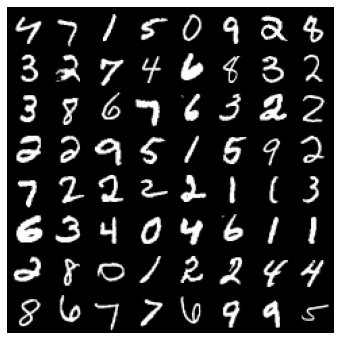

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.nn import functional as F
from torch.utils.data import DataLoader
import torchvision.utils as vutils
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])
data = datasets.MNIST(root='./data',download=True, transform=transform)
img_shape = (data[1][0].size(0), data[1][0].size(1), data[1][0].size(2))
print(f'Input size is {img_shape}')

# Prepare dataloader for training
batch_size = 256
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True)

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(6,6))
plt.axis("off")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0][:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [2]:
###########################
### Vanilla GAN Training
###########################

from GAN import Generator, Discriminator, Train

dim_latent = 100
lr = 0.001
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

# Initialize generator and discriminator
G = Generator(img_shape=img_shape, dim_latent=dim_latent, g_dims=[128,256,512,1024]).to(device)
D = Discriminator(img_shape=img_shape, d_dims=[512, 256]).to(device)

optimizer_G = torch.optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))

Train(epoch=50, dataloader=dataloader, cuda=cuda, G=G, D=D, 
      optimizer_G=optimizer_G, optimizer_D=optimizer_D)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 / D loss: 1.2793 / G loss: 0.9026
Epoch 1 / D loss: 1.9529 / G loss: 1.1697
Epoch 2 / D loss: 1.2214 / G loss: 0.7161
Epoch 3 / D loss: 1.1748 / G loss: 0.7700
Epoch 4 / D loss: 1.0113 / G loss: 1.7202
Epoch 5 / D loss: 0.9941 / G loss: 1.2914
Epoch 6 / D loss: 1.1362 / G loss: 1.0302
Epoch 7 / D loss: 1.1824 / G loss: 0.9340
Epoch 8 / D loss: 1.2374 / G loss: 0.6052
Epoch 9 / D loss: 1.4386 / G loss: 0.3144
Epoch 10 / D loss: 1.2941 / G loss: 1.1955
Epoch 11 / D loss: 1.3264 / G loss: 0.9683
Epoch 12 / D loss: 1.2851 / G loss: 0.6628
Epoch 13 / D loss: 1.2465 / G loss: 1.1101
Epoch 14 / D loss: 1.3057 / G loss: 0.6187
Epoch 15 / D loss: 1.2730 / G loss: 0.9218
Epoch 16 / D loss: 1.2469 / G loss: 1.1607
Epoch 17 / D loss: 1.2626 / G loss: 0.8984
Epoch 18 / D loss: 1.2741 / G loss: 0.9762
Epoch 19 / D loss: 1.3458 / G loss: 0.8461
Epoch 20 / D loss: 1.2538 / G loss: 0.7975
Epoch 21 / D loss: 1.2651 / G loss: 0.8210
Epoch 22 / D loss: 1.5699 / G loss: 0.5782
Epoch 23 / D loss: 1.

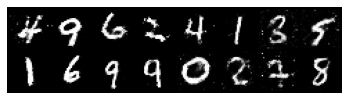

In [11]:
##################################
### Examples of Generated Images
##################################

G.eval()
z = torch.FloatTensor(np.random.normal(0, 1, (16, dim_latent))).to(device)
fake = G(z).detach().cpu()
plt.axis("off")
plt.imshow(np.transpose(vutils.make_grid(fake, padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()